In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
% matplotlib inline
import pickle
import numpy as np
from IPython.display import display

In [2]:
r1 = pickle.load(open('allDataPart1.text'))
df1 = pd.DataFrame.from_dict(r1)
r2 = pickle.load(open('allDataPart2.text'))
df2 = pd.DataFrame.from_dict(r2)
df = pd.concat([df1, df2])

In [3]:
display(df)

,acceptedAnswerId,acceptedAnswerScore,averageLengthOfCodeSnippet,englishNumChars,englishNumWords,numQuestionMarks,numberImages,numberLinks,numberOfCodeSnippets,totalLinesOfCode,viewCount
0,231855,9581,6.500000,413,71,7,0,1,2,13,1293577
1,100146,1433,0.000000,48,8,2,0,0,0,0,480945
2,394814,3717,0.000000,120,18,1,0,0,0,0,910055
3,419185,3041,13.000000,20,4,1,0,0,1,13,1116079
4,89243,2595,0.000000,129,24,1,0,0,0,0,1912761
5,26853961,1904,7.000000,361,63,1,0,0,1,7,788978
6,613218,2666,0.000000,444,86,1,0,1,0,0,1294243
7,273227,2496,7.500000,313,56,2,0,0,2,15,1245162
8,739665,2453,2.500000,223,36,1,0,0,2,5,383769
9,423596,2780,0.000000,195,35,2,0,0,0,0,1999493


In [4]:
def quickplot(df, x, y, titlestr=None):
    plt.plot(df[x], df[y], '*')
    plt.xlabel(x)
    plt.ylabel(y)
    if titlestr:
        plt.title(titlestr)
    plt.show()
    
def dividedByMax(df, col_name):
    dbm_col_name = col_name + 'DividedByMax'
    df[dbm_col_name] = df[col_name].div(df[col_name].max())
    return df

def normalize(df, col_name):
    normalized_col_name = col_name + 'Normalized'
    df[normalized_col_name] = (df[col_name] - df[col_name].mean()) / (df[col_name].max() - df[col_name].min())
    return df

def dividedByViewCount(df, col_name):
    dvc_col_name = col_name + 'DividedByViewCount'
    df[dvc_col_name] = df[col_name].div(df['viewCount'])
    return df

In [5]:
### Normalized dataframe columns
# df = normalize(df, 'totalLinesOfCode')
# df = dividedByMax(df, 'acceptedAnswerScore')
# df = normalize(df, 'acceptedAnswerScore')

df = dividedByViewCount(df, 'acceptedAnswerScore')
display(df.head())

,acceptedAnswerId,acceptedAnswerScore,averageLengthOfCodeSnippet,englishNumChars,englishNumWords,numQuestionMarks,numberImages,numberLinks,numberOfCodeSnippets,totalLinesOfCode,viewCount,acceptedAnswerScoreDividedByViewCount
0,231855,9581,6.5,413,71,7,0,1,2,13,1293577,0.007407
1,100146,1433,0.0,48,8,2,0,0,0,0,480945,0.002980
2,394814,3717,0.0,120,18,1,0,0,0,0,910055,0.004084
3,419185,3041,13.0,20,4,1,0,0,1,13,1116079,0.002725
4,89243,2595,0.0,129,24,1,0,0,0,0,1912761,0.001357


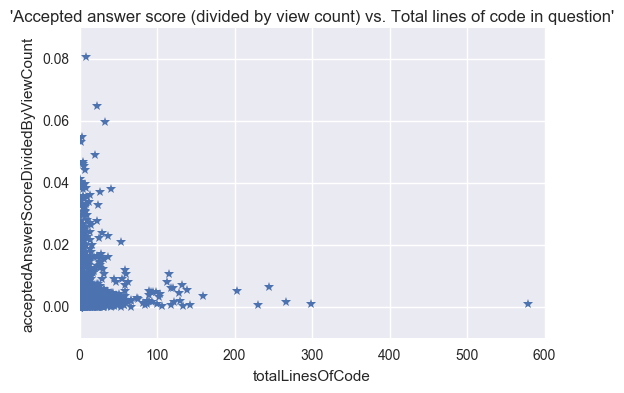

In [6]:
quickplot(df, 'totalLinesOfCode', 'acceptedAnswerScoreDividedByViewCount', 
          titlestr="'Accepted answer score (divided by view count) vs. Total lines of code in question'")

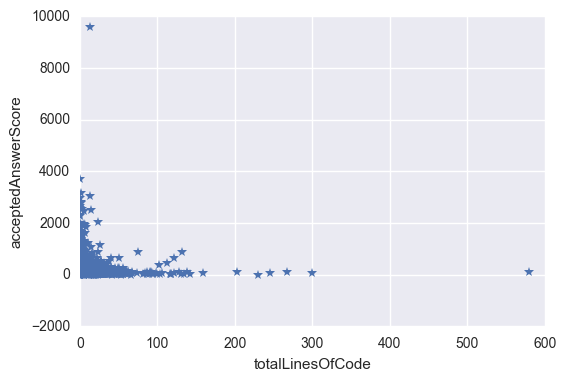

In [7]:
quickplot(df, 'totalLinesOfCode', 'acceptedAnswerScore',
          titlestr='')

le comments:
- Questions that are popular seem to have fewer lines of code (most seem to have under 20, see the dense "cluster" of points).

Process stuff:
- Does the plot look different without the dividing by view count?
- Let's take a closer look at the 0 to 20 lines of code region...

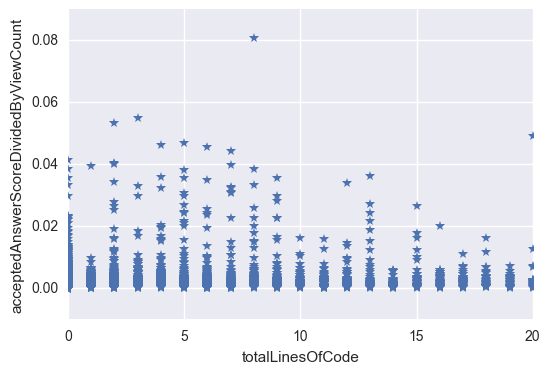

In [8]:
plt.plot(df['totalLinesOfCode'], df['acceptedAnswerScoreDividedByViewCount'], '*')
plt.xlabel('totalLinesOfCode')
plt.ylabel('acceptedAnswerScoreDividedByViewCount')
axes = plt.gca()
axes.set_xlim([0, 20])
plt.show()

^ Ok that wasn't as exciting as we thought it'd be. Stick with the entire plot.

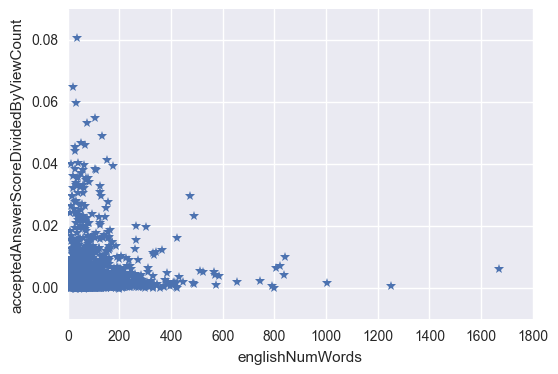

In [9]:
quickplot(df, 'englishNumWords', 'acceptedAnswerScoreDividedByViewCount')

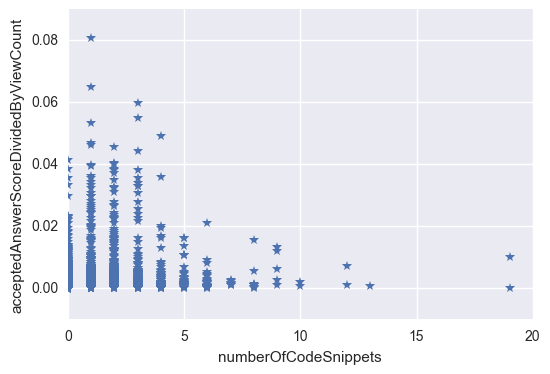

In [10]:
quickplot(df, 'numberOfCodeSnippets', 'acceptedAnswerScoreDividedByViewCount')

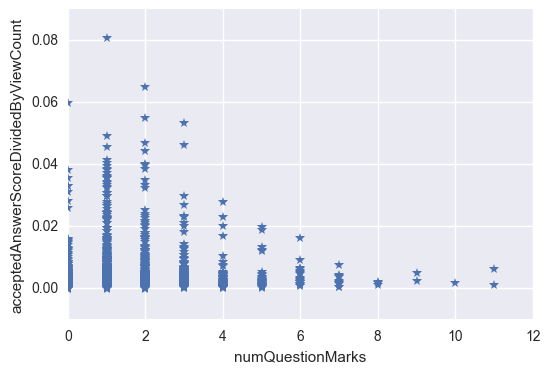

In [14]:
quickplot(df, 'numQuestionMarks', 'acceptedAnswerScoreDividedByViewCount')

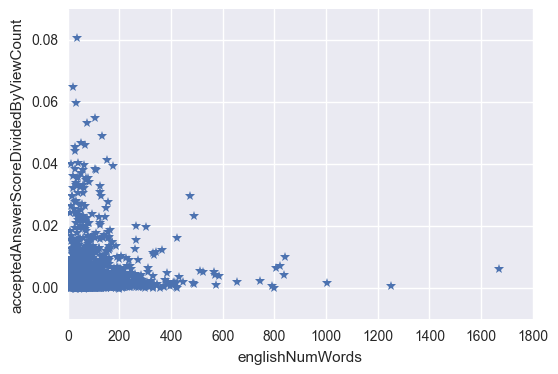

In [15]:
quickplot(df, 'englishNumWords', 'acceptedAnswerScoreDividedByViewCount')

A lot of questions under 200 words have "satisfaction level" under 0.02. 

In [26]:
lessThan200Words = 0
for i in df['englishNumWords']:
    if i<200:
        lessThan200Words += 1
print lessThan200Words/4411.0

0.962366810247


96% of the questions in our dataset have under 200 English words (not including code) in the question.

In [28]:
display(df.head())

,acceptedAnswerId,acceptedAnswerScore,averageLengthOfCodeSnippet,englishNumChars,englishNumWords,numQuestionMarks,numberImages,numberLinks,numberOfCodeSnippets,totalLinesOfCode,viewCount,acceptedAnswerScoreDividedByViewCount
0,231855,9581,6.5,413,71,7,0,1,2,13,1293577,0.007407
1,100146,1433,0.0,48,8,2,0,0,0,0,480945,0.002980
2,394814,3717,0.0,120,18,1,0,0,0,0,910055,0.004084
3,419185,3041,13.0,20,4,1,0,0,1,13,1116079,0.002725
4,89243,2595,0.0,129,24,1,0,0,0,0,1912761,0.001357


What's going on with the (1) the 96% of questions with less than 200 words and (2) the 4% of questions above 200 words? (not including code)

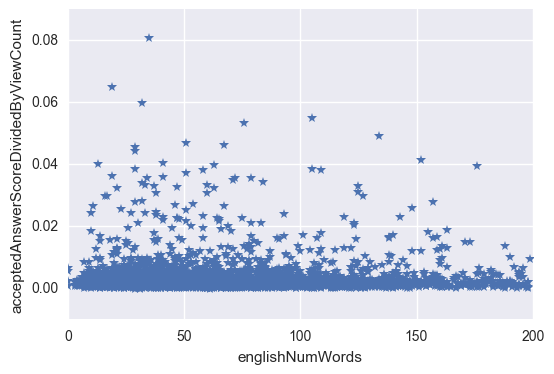

In [34]:
dfLessThan200Words = df[df['englishNumWords']<200]
quickplot(dfLessThan200Words, 'englishNumWords', 'acceptedAnswerScoreDividedByViewCount')

Hmm... Doesn't look like there's a particular correlation here. What about question marks??

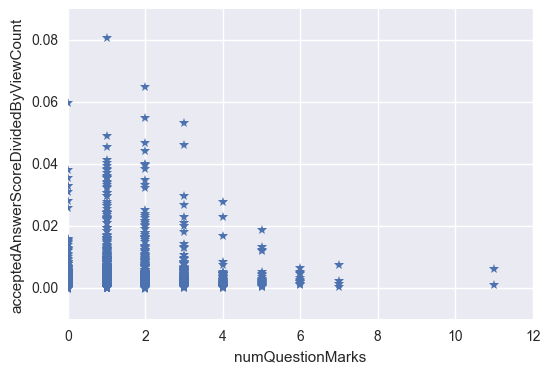

In [36]:
quickplot(dfLessThan200Words, 'numQuestionMarks', 'acceptedAnswerScoreDividedByViewCount')

In [40]:
acceptedAnswerScoreThreshold = 0.02
dfLessThan200WordsAboveAASThreshold = dfLessThan200Words[dfLessThan200Words['acceptedAnswerScoreDividedByViewCount']>0.02]
display(dfLessThan200WordsAboveAASThreshold)

,acceptedAnswerId,acceptedAnswerScore,averageLengthOfCodeSnippet,englishNumChars,englishNumWords,numQuestionMarks,numberImages,numberLinks,numberOfCodeSnippets,totalLinesOfCode,viewCount,acceptedAnswerScoreDividedByViewCount
175,31421411,683,2.000000,120,23,1,0,0,3,6,26526,0.025748
360,30100743,341,3.500000,732,125,0,0,0,2,7,10956,0.031124
681,43487884,196,2.500000,436,79,3,0,0,2,5,9254,0.021180
779,39619467,293,9.000000,198,32,0,0,1,1,9,10380,0.028227
884,9284410,176,5.000000,830,134,1,0,2,4,20,3582,0.049135
895,8272643,301,13.333333,660,109,1,0,2,3,40,7857,0.038310
1007,21881463,231,1.000000,94,13,2,0,0,2,2,5751,0.040167
1037,11476240,146,4.000000,201,32,1,0,1,3,12,4278,0.034128
1040,27385659,137,0.000000,166,30,2,0,0,0,0,6459,0.021211
1074,37054723,126,18.500000,790,119,4,4,6,2,37,5505,0.022888


A spinoff question/direction would be to compare unanswered questions with these popular answered questions.

Our dataset includes questions from the python tag that were the most popular (questions with the most votes) for May 2017. 

Jennie looking at Weka plots: 
They trail off to the top or the bottom, but not the center. Everything seems to fall in a bottom left "blob" of the graphs... This may be because our data includes a handful of questions/answers that are "exceptional" in some way (that may make the graphs look skewed).

Almost nothing has images; that may be due to the nature of the python questions asked. If we were looking at, for example, the computer graphics questions on SO, we may see more pictures. 

OK! Let's have a dataframe that looks at the aforementioned region in the bottom left of our plots thus far. 

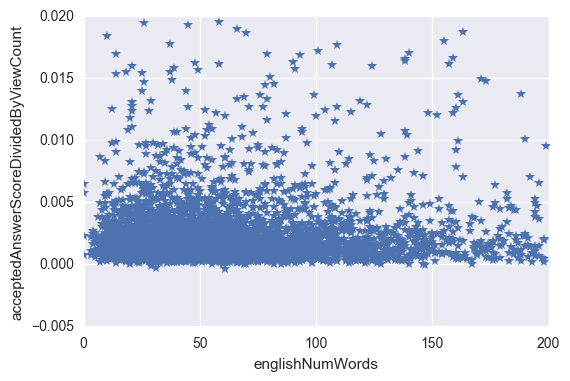

In [43]:
dfBlob = df[df['englishNumWords']<200]
dfBlob = dfBlob[dfBlob['acceptedAnswerScoreDividedByViewCount']<0.02]
quickplot(dfBlob, 'englishNumWords', 'acceptedAnswerScoreDividedByViewCount')

So... the blob gets more and more condensed. Let's try it at a AASDBVC threshold of 0.005.

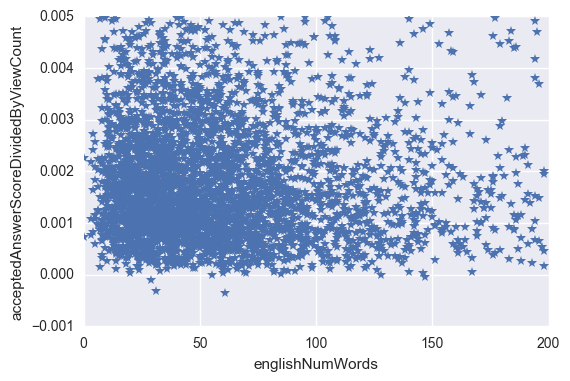

In [44]:
dfBlob = df[df['englishNumWords']<200]
dfBlob = dfBlob[dfBlob['acceptedAnswerScoreDividedByViewCount']<0.005]
quickplot(dfBlob, 'englishNumWords', 'acceptedAnswerScoreDividedByViewCount')

OK.. so, back to the entire dataframe. Let's get some summary statistics!

In [45]:
display(df.head())

,acceptedAnswerId,acceptedAnswerScore,averageLengthOfCodeSnippet,englishNumChars,englishNumWords,numQuestionMarks,numberImages,numberLinks,numberOfCodeSnippets,totalLinesOfCode,viewCount,acceptedAnswerScoreDividedByViewCount
0,231855,9581,6.5,413,71,7,0,1,2,13,1293577,0.007407
1,100146,1433,0.0,48,8,2,0,0,0,0,480945,0.002980
2,394814,3717,0.0,120,18,1,0,0,0,0,910055,0.004084
3,419185,3041,13.0,20,4,1,0,0,1,13,1116079,0.002725
4,89243,2595,0.0,129,24,1,0,0,0,0,1912761,0.001357


In [48]:
print "For the overall dataset"
# print list(df.columns.values)
for c in list(df.columns.values):
    print c, df[c].mean()

acceptedAnswerId 7964248.1732
acceptedAnswerScore 155.751076853
averageLengthOfCodeSnippet 4.14093921384
englishNumChars 401.751983677
englishNumWords 70.4751756971
numQuestionMarks 1.27612786216
numberImages 0.0188165948764
numberLinks 0.373158014056
numberOfCodeSnippets 1.15211970075
totalLinesOfCode 7.08116073453
viewCount 99724.3779188
acceptedAnswerScoreDividedByViewCount 0.00296636602022


Interesting... So... the average accepted answer score was way lower than we thought (0.002ish divided by view count and 156ish raw count). There are almost no images in these questions. Almost everything has one question mark. 

What's an interesting subset of the data that we can look at further? How about the questions that have fewer than 25 words and questions that have no code? If there's a particularly interesting point, we can look up the id/read the Q&A content and try to connect the dots between these zoomed out data plots and the actual page. 

In [50]:
dfLessThan25Words = df[df['englishNumWords']<25]

for c in list(dfLessThan25Words.columns.values):
    print c, dfLessThan25Words[c].mean()

acceptedAnswerId 6059798.9251
acceptedAnswerScore 240.138696255
averageLengthOfCodeSnippet 3.70515487748
englishNumChars 97.3384188627
englishNumWords 16.6796116505
numQuestionMarks 0.973647711512
numberImages 0.00416088765603
numberLinks 0.126213592233
numberOfCodeSnippets 0.778085991678
totalLinesOfCode 4.74757281553
viewCount 149119.145631
acceptedAnswerScoreDividedByViewCount 0.00269653027028


These questions are viewed much more frequently (about 1.5x as much) and have a higher raw answer score. What % of the overall dataset is this?

In [57]:
print float(dfLessThan25Words.shape[0])/df.shape[0] * 100

16.3454998866


Let's look at a quartile of this data (so, the 25% of the data with the fewest words). (yay trial and error tweaking)

In [63]:
dfQuartile = df[df['englishNumWords']<32]

for c in list(dfQuartile.columns.values):
    print c, dfQuartile[c].mean()
    
print float(dfQuartile.shape[0])/df.shape[0] * 100

acceptedAnswerId 6611847.08438
acceptedAnswerScore 213.8994614
averageLengthOfCodeSnippet 3.45979952124
englishNumChars 118.902154399
englishNumWords 20.6122082585
numQuestionMarks 0.998204667864
numberImages 0.00538599640934
numberLinks 0.140933572711
numberOfCodeSnippets 0.850987432675
totalLinesOfCode 4.69120287253
viewCount 136455.51526
acceptedAnswerScoreDividedByViewCount 0.00276078542253
25.2550442077


OK! So, questions with less than 32 words make up approximately 25.25% of the overall dataset. 

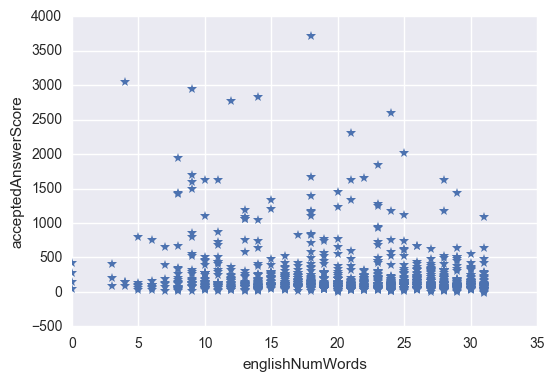

In [64]:
quickplot(dfQuartile, 'englishNumWords', 'acceptedAnswerScore')

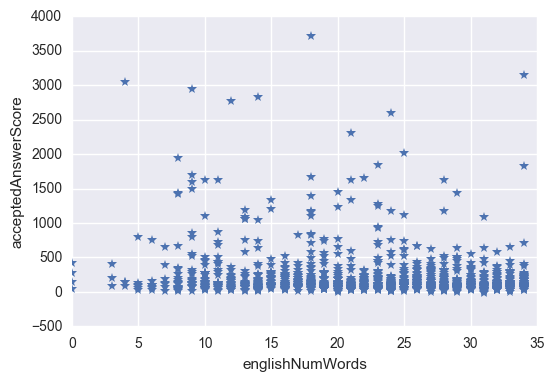

In [66]:
quickplot(dfLessThan25Words, 'englishNumWords', 'acceptedAnswerScore')

So... It doesn't look like there's a particular correlation in these plots to follow up on.

Let's try questions with no code.

In [68]:
dfQuestionsWithNoCode = df[df['numberOfCodeSnippets']==0]

for c in list(dfQuestionsWithNoCode.columns.values):
    print c, dfQuestionsWithNoCode[c].mean()
    
print float(dfQuestionsWithNoCode.shape[0])/df.shape[0] * 100

acceptedAnswerId 6403830.29891
acceptedAnswerScore 164.829283111
averageLengthOfCodeSnippet 0.0
englishNumChars 384.046780073
englishNumWords 67.4544349939
numQuestionMarks 1.37424058323
numberImages 0.0230862697448
numberLinks 0.46354799514
numberOfCodeSnippets 0.0
totalLinesOfCode 0.0
viewCount 104880.330498
acceptedAnswerScoreDividedByViewCount 0.00261136424997
37.3158014056


Hmmm.

What are the quartiles of the dataset based on everything?

In [78]:
df.quantile([0.1, 0.5, 0.75, 0.9])

,acceptedAnswerId,acceptedAnswerScore,averageLengthOfCodeSnippet,englishNumChars,englishNumWords,numQuestionMarks,numberImages,numberLinks,numberOfCodeSnippets,totalLinesOfCode,viewCount,acceptedAnswerScoreDividedByViewCount
0.10,518007.0,33.0,0.000000,109.0,19.0,0.0,0.0,0.0,0.0,0.0,13830.0,0.000576
0.50,4859181.0,89.0,1.666667,292.0,52.0,1.0,0.0,0.0,1.0,2.0,54367.0,0.001732
0.75,11511169.5,154.0,5.000000,479.0,85.0,2.0,0.0,0.0,2.0,8.0,107568.5,0.002973
0.90,19798528.0,293.0,10.000000,774.0,136.0,2.0,0.0,1.0,3.0,18.0,210524.0,0.005331


So... the majority of the data does have a high acceptedAnswerScore and has two question marks. So, roughly, an outlier would have aspects that are larger than the values in the 0.90 row. 

What have we learned?
* Common behaviors about popular python questions that have accepted answers
* There's usually no more than two questions (based on # of question marks)
* Don't include images or links (may be due to the subject matter)
* Don't have an overwhelming amount of code lines or code snippets 

Verified what we thought: keep questions short, only include necessary code snippets for the question, and only ask one (maybe two) questions in one post. 

During mysore last week the group brought up the concern that "more interesting questions will obviously get more traffic." We still agree with this, but now we're thinking about... XYZ

Zooming back a bit about the users/motivations, the goal of an asker is not necessarily to generate the most popular questions/answers... it's to resolve the particular programming dilemma they have. That being said, it is great when the popular questions on SO (and hopefully the less popular questions too) are well-worded and elicit good discussions about programming practices. 

Askers are likely not trying to get popularity. Answerers may be trying to produce answers with a lot of votes (and thus solidying their reputation, programmer cred, etc). 

Let's take a look at the badges page... http://stackoverflow.com/help/badges

* Nice question: Score 10+ and 416.6k awarded
* Good question: Score 25+ and 129.9k awarded
* Great question: Score 100+ and 20.6k awarded 

* Nice answer: Score 10+ and 868.7k awarded
* Good answer: Score 25+ and 277.6k awarded
* Great asnwer: Score 100+ and 45.4k awarded

Way more people get positive answer badges than positive question badges.

What gets a question answered at all and what makes a good answer?
And also, what about those unanswered questions that fall through the cracks? (Or... what about unanswered questions with LOTS of views?) 

PROCESS SUMMARY:
* gathering data (eventually getting to a dataset of ~4400 questions) --> dataframe and jupyter notebook
* Jennie also did some stuff in Weka; didn't find major correlations/predictors 
* plotting overall dataset
* plotting specific subsets of the dataset that we were interested in --> much blob 
* comparing summary statistics in these different subsets
* asking questions along the way, following curiosities
* connecting back to SO design (specifically badges) and motivations of askers vs. answerers --> what does successful SO usage look like? what does a thriving SO community look like? etc. 
* considering followup questions 

In retrospect, although our initial question led us to get started quickly, it may not have been the most fruitful in regards to demystifying SO behavior. We could have defined better criteria for interesting questions/answers to investigate. However that likely would have involved more sophisticated natural language processing. 